In [5]:
import sys
print(sys.executable)

c:\Users\ayush\OneDrive\Desktop\alphagaze\alphagaze_env\Scripts\python.exe


In [8]:
import yfinance as yf
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("All libraries imported successfully!")

All libraries imported successfully!


In [7]:
# Download NIFTY 50 index data
df = yf.download("^NSEI", start="2018-01-01", end="2024-01-01")

# Reset index and inspect
df = df.reset_index()
df.head()


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
0,2018-01-02,10442.200195,10495.200195,10404.650391,10477.549805,153400
1,2018-01-03,10443.200195,10503.599609,10429.549805,10482.650391,167300
2,2018-01-04,10504.799805,10513.000000,10441.450195,10469.400391,174900
3,2018-01-05,10558.849609,10566.099609,10520.099609,10534.250000,180900
4,2018-01-08,10623.599609,10631.200195,10588.549805,10591.700195,169000


In [11]:
# Select required columns and rename
prophet_df = df[["Date", "Close"]].copy()
prophet_df.columns = ["ds", "y"]

# Ensure correct data types
prophet_df["ds"] = pd.to_datetime(prophet_df["ds"])
prophet_df["y"] = prophet_df["y"].astype(float)

prophet_df.head()


,ds,y
0,2018-01-02,10442.200195
1,2018-01-03,10443.200195
2,2018-01-04,10504.799805
3,2018-01-05,10558.849609
4,2018-01-08,10623.599609


<Axes: >

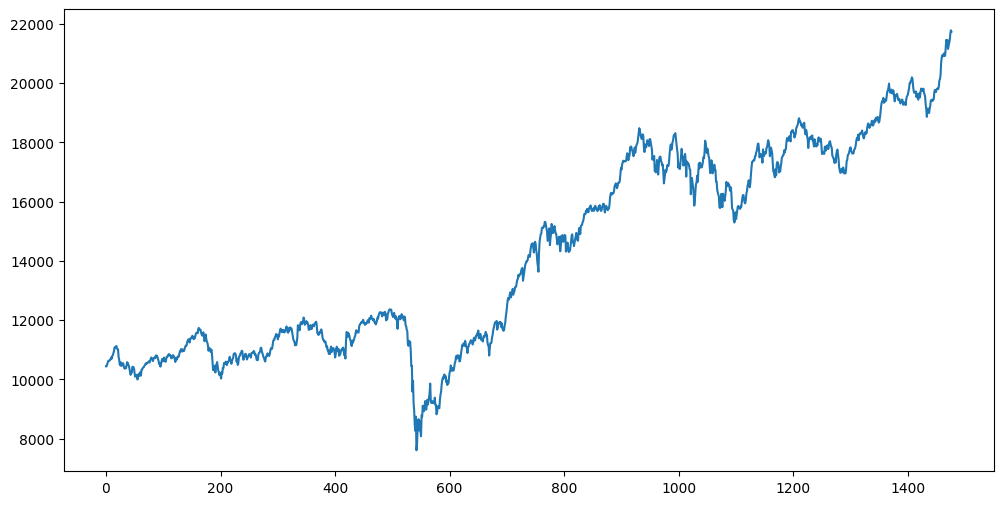

In [13]:
color_pal = sns.color_palette()
prophet_df["y"].plot(style='-', color=color_pal[0], figsize=(12, 6))


In [14]:
# Check for missing values
prophet_df.isnull().sum()

ds    0
y     0
dtype: int64

In [15]:
# Initialize Prophet model
model = Prophet(
    daily_seasonality=False,
    weekly_seasonality=True,
    yearly_seasonality=True
)

# Fit model
model.fit(prophet_df)


15:00:25 - cmdstanpy - INFO - Chain [1] start processing
15:00:26 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
# Forecast next 30 days
future = model.make_future_dataframe(periods=30)

forecast = model.predict(future)
forecast.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-02,10279.901677,10184.921894,11330.488754,10279.901677,10279.901677,472.902872,472.902872,472.902872,-6.516360,-6.516360,-6.516360,479.419231,479.419231,479.419231,0.0,0.0,0.0,10752.804549
1,2018-01-03,10285.260161,10196.994919,11370.455643,10285.260161,10285.260161,471.904175,471.904175,471.904175,-12.000977,-12.000977,-12.000977,483.905152,483.905152,483.905152,0.0,0.0,0.0,10757.164336
2,2018-01-04,10290.618645,10182.371657,11350.003188,10290.618645,10290.618645,475.462027,475.462027,475.462027,-12.546290,-12.546290,-12.546290,488.008317,488.008317,488.008317,0.0,0.0,0.0,10766.080671
3,2018-01-05,10295.977128,10156.005940,11287.463173,10295.977128,10295.977128,461.774253,461.774253,461.774253,-29.820262,-29.820262,-29.820262,491.594515,491.594515,491.594515,0.0,0.0,0.0,10757.751381
4,2018-01-08,10312.052579,10143.791621,11445.455510,10312.052579,10312.052579,466.753465,466.753465,466.753465,-31.292752,-31.292752,-31.292752,498.046218,498.046218,498.046218,0.0,0.0,0.0,10778.806044


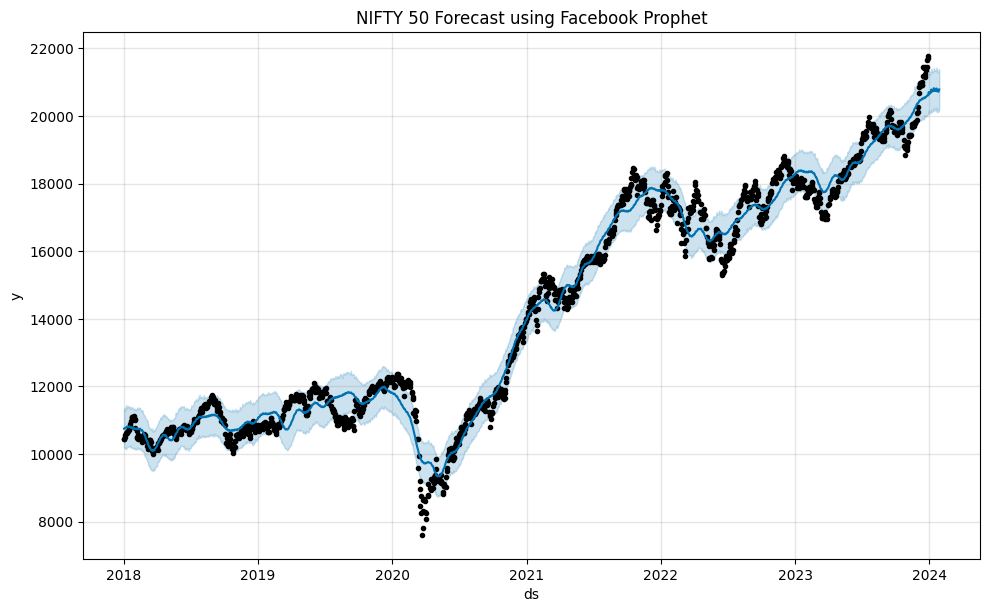

In [17]:
# Plot forecast
model.plot(forecast)
plt.title("NIFTY 50 Forecast using Facebook Prophet")
plt.show()


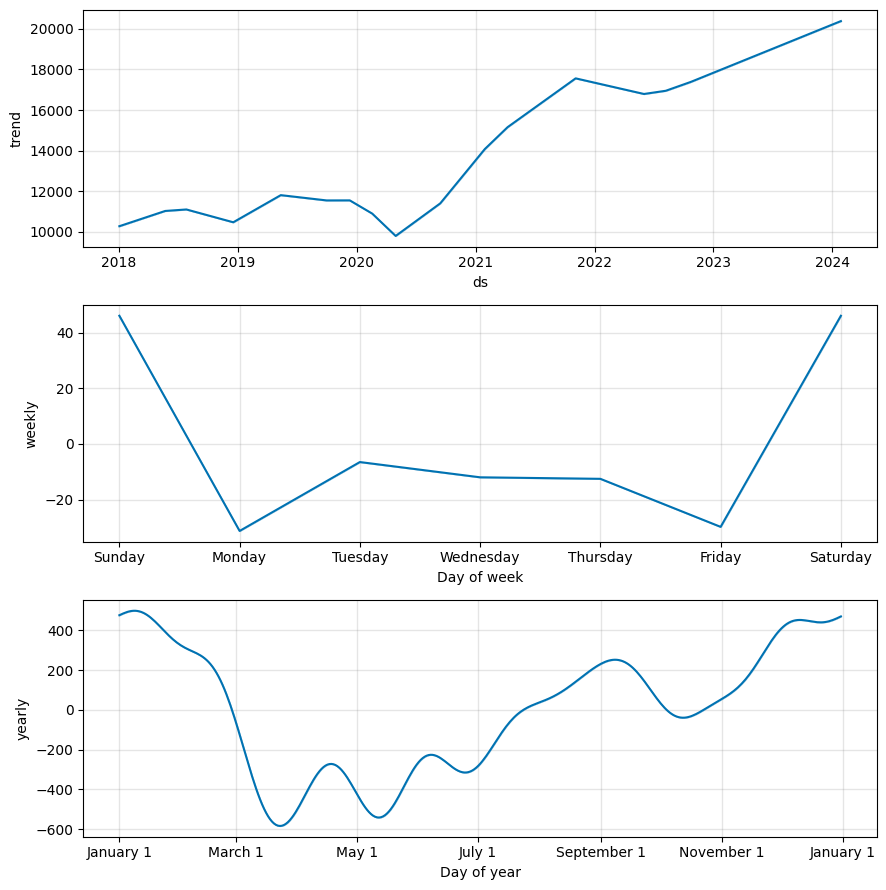

In [18]:
# Plot trend and seasonality components
model.plot_components(forecast)
plt.show()
